In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Custom transformer to select a single column
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.column_name]

# Load and preprocess the data
file_path = 'F:\\Masters 2nd Semester\\Thesis\\NewsPaper\\bangla.csv'
data = pd.read_csv(file_path)

# Drop missing values
data.dropna(inplace=True)

# Encode categories
label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])

# Prepare the input features and labels
X = data[['headline', 'content']]  # Use both 'headline' and 'content'
y = data['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define separate TF-IDF vectorizers for 'headline' and 'content'
tfidf_headline = Pipeline([
    ('selector', ColumnSelector(column_name='headline')),
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2)))
])

tfidf_content = Pipeline([
    ('selector', ColumnSelector(column_name='content')),
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2)))
])

# Use FeatureUnion to combine both TF-IDF representations
feature_union = FeatureUnion([
    ('tfidf_headline', tfidf_headline),
    ('tfidf_content', tfidf_content)
])

# Define a pipeline with FeatureUnion and SVM
pipeline = Pipeline([
    ('features', feature_union),
    ('svm', SVC(kernel='linear', C=1, random_state=42))  # Linear SVM model
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Predict using the test set
y_pred = pipeline.predict(X_test)

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.6864

Classification Report:
               precision    recall  f1-score   support

        Crime       0.47      0.32      0.38        71
    Editorial       0.49      0.26      0.34       204
    Education       0.52      0.54      0.53        50
Entertainment       0.72      0.73      0.72       164
      Finance       0.59      0.49      0.53        55
International       0.70      0.65      0.67       376
    Lifestyle       0.60      0.34      0.44        70
Miscellaneous       0.57      0.55      0.56       265
     National       0.69      0.83      0.75      1072
     Politics       0.58      0.52      0.55       179
       Sports       0.90      0.92      0.91       344
   Technology       0.76      0.64      0.69        58

     accuracy                           0.69      2908
    macro avg       0.63      0.56      0.59      2908
 weighted avg       0.68      0.69      0.67      2908



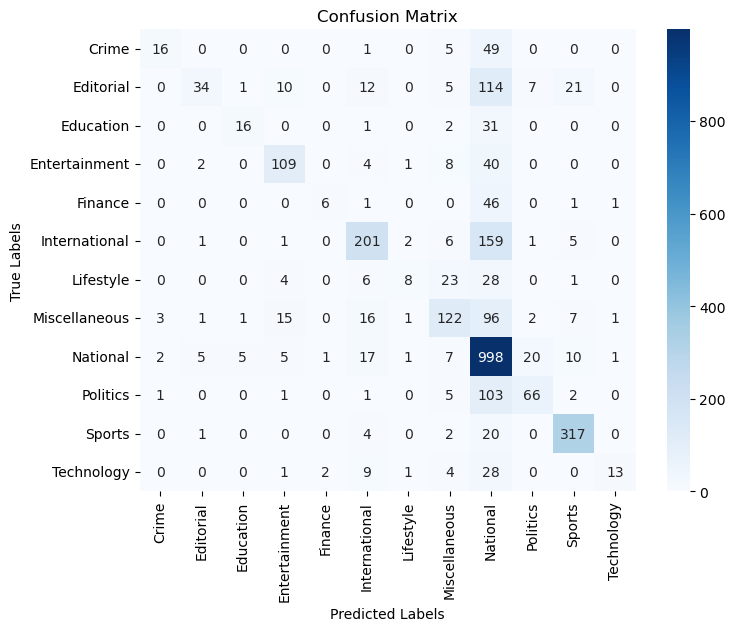

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a dataframe for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Accuracy: 0.6554

Classification Report:
               precision    recall  f1-score   support

        Crime       0.73      0.23      0.34        71
    Editorial       0.77      0.17      0.27       204
    Education       0.70      0.32      0.44        50
Entertainment       0.75      0.66      0.70       164
      Finance       0.67      0.11      0.19        55
International       0.74      0.53      0.62       376
    Lifestyle       0.57      0.11      0.19        70
Miscellaneous       0.65      0.46      0.54       265
     National       0.58      0.93      0.72      1072
     Politics       0.69      0.37      0.48       179
       Sports       0.87      0.92      0.90       344
   Technology       0.81      0.22      0.35        58

     accuracy                           0.66      2908
    macro avg       0.71      0.42      0.48      2908
 weighted avg       0.68      0.66      0.62      2908



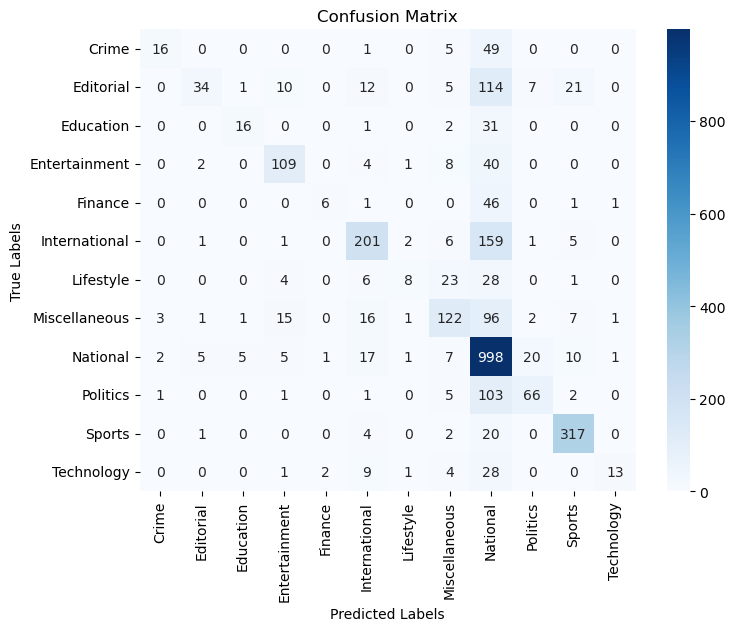

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Custom transformer to select a single column
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.column_name]

# Load and preprocess the data
file_path = 'F:\\Masters 2nd Semester\\Thesis\\NewsPaper\\bangla.csv'
data = pd.read_csv(file_path)

# Drop missing values
data.dropna(inplace=True)

# Encode categories
label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])

# Prepare the input features and labels
X = data[['headline', 'content']]  # Use both 'headline' and 'content'
y = data['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define separate TF-IDF vectorizers for 'headline' and 'content'
tfidf_headline = Pipeline([
    ('selector', ColumnSelector(column_name='headline')),
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2)))
])

tfidf_content = Pipeline([
    ('selector', ColumnSelector(column_name='content')),
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2)))
])

# Use FeatureUnion to combine both TF-IDF representations
feature_union = FeatureUnion([
    ('tfidf_headline', tfidf_headline),
    ('tfidf_content', tfidf_content)
])

# Define a pipeline with FeatureUnion and Random Forest
pipeline = Pipeline([
    ('features', feature_union),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))  # Random Forest with 100 trees
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Predict using the test set
y_pred = pipeline.predict(X_test)

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a dataframe for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


